#+TITLE: AutoAugment
#+CATEGORIES: regularization optimization
#+TAGS: augmentation
#+DESCRIPTION: Learning optimal transformation pipelines for data augmentation.
#+AUTHORS: Ekin D. Cubuk, Barret Zoph, Dandelion Mane, Vijay Vasudevan, Quoc V. Le
#+SOURCE: https://arxiv.org/abs/1805.09501
#+DATE: 2024-03-24

# AutoAugment

Data augmentation is a popular technique used to improve generalization performance by creating additional training samples through the augmentation of existing training samples with various strategies like rotation, scaling, flipping, cropping, and brightness or color adjustments. It's a very reliable way to increase the size of small datasets and to encourage robust knowledge representations.

Typical augmentation strategies are selected manually by researchers and different benchmarks tend to have different standard transformations. AutoAugment is a procedure that was introduced to find the optimal combination of augmentation strategies for various datasets.

AutoAugment explores a search space where a policy consists of many sub-policies where one is randomly chosen for each image in each mini-batch. A sub-policy consists of a combination of standard image processing functions like translation, rotation, or shearing, and a set of probabilities and magnitudes used to parameterize the transformation.

The authors include learned policies for ImageNet, CIFAR, and SVHN and all are easily accessible in PyTorch. An example for the imagenet policy is included below.

In [ ]:
autoaugment_imagenet = [
    (("Posterize", 0.4, 8), ("Rotate", 0.6, 9)),
    (("Solarize", 0.6, 5), ("AutoContrast", 0.6, None)),
    (("Equalize", 0.8, None), ("Equalize", 0.6, None)),
    (("Posterize", 0.6, 7), ("Posterize", 0.6, 6)),
    (("Equalize", 0.4, None), ("Solarize", 0.2, 4)),
    (("Equalize", 0.4, None), ("Rotate", 0.8, 8)),
    (("Solarize", 0.6, 3), ("Equalize", 0.6, None)),
    (("Posterize", 0.8, 5), ("Equalize", 1.0, None)),
    (("Rotate", 0.2, 3), ("Solarize", 0.6, 8)),
    (("Equalize", 0.6, None), ("Posterize", 0.4, 6)),
    (("Rotate", 0.8, 8), ("Color", 0.4, 0)),
    (("Rotate", 0.4, 9), ("Equalize", 0.6, None)),
    (("Equalize", 0.0, None), ("Equalize", 0.8, None)),
    (("Invert", 0.6, None), ("Equalize", 1.0, None)),
    (("Color", 0.6, 4), ("Contrast", 1.0, 8)),
    (("Rotate", 0.8, 8), ("Color", 1.0, 2)),
    (("Color", 0.8, 8), ("Solarize", 0.8, 7)),
    (("Sharpness", 0.4, 7), ("Invert", 0.6, None)),
    (("ShearX", 0.6, 5), ("Equalize", 1.0, None)),
    (("Color", 0.4, 0), ("Equalize", 0.6, None)),
    (("Equalize", 0.4, None), ("Solarize", 0.2, 4)),
    (("Solarize", 0.6, 5), ("AutoContrast", 0.6, None)),
    (("Invert", 0.6, None), ("Equalize", 1.0, None)),
    (("Color", 0.6, 4), ("Contrast", 1.0, 8)),
    (("Equalize", 0.8, None), ("Equalize", 0.6, None)),
]

Files already downloaded and verified


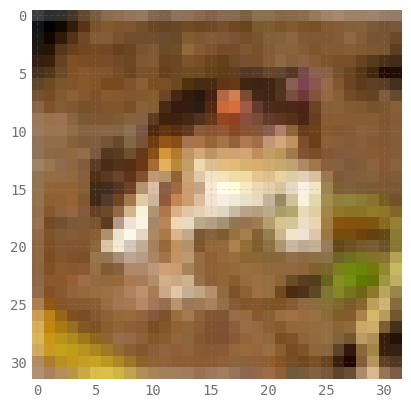

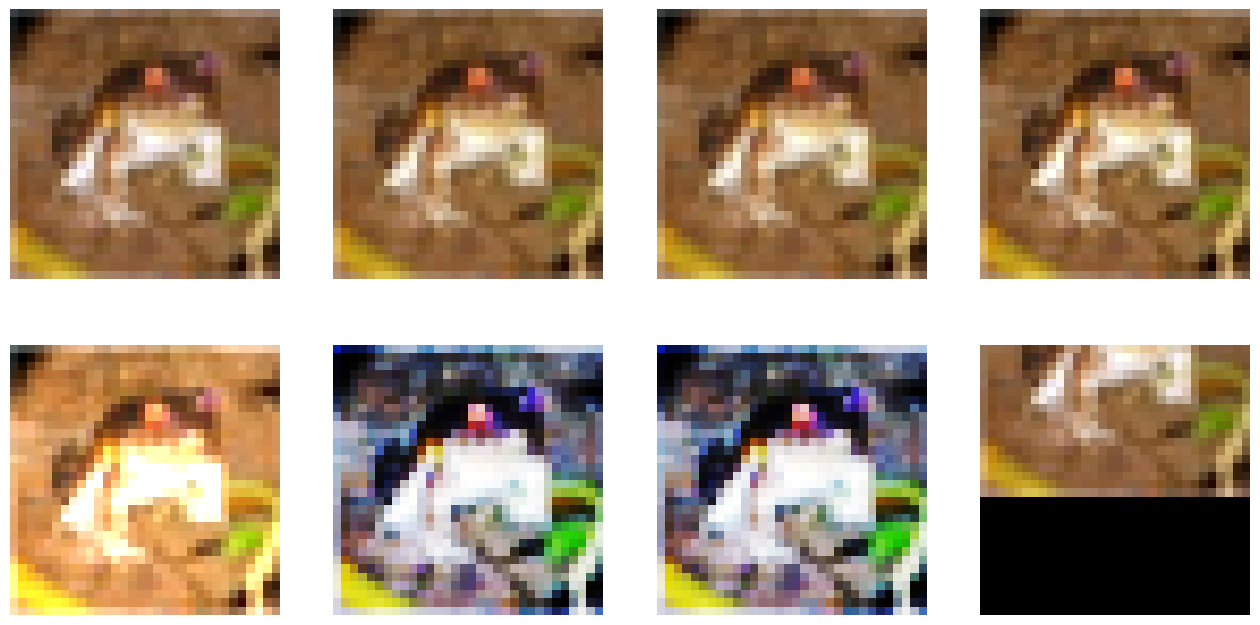

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

plt.style.use('./deadneuron.mplstyle')

dataset = torchvision.datasets.CIFAR10("../data", train=True, download=True)

plt.imshow(dataset[0][0])

def plot_samples(img, transforms, rows=2, cols=4):
    imgs = [transforms(img) for _ in range(rows*cols)]
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
    
    for i in range(rows):
        for j in range(cols):
            axs[i,j].imshow(imgs[(cols*i)+j])
            axs[i,j].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    

transforms = torchvision.transforms.Compose(
    [torchvision.transforms.RandomCrop(32, padding=4),
     torchvision.transforms.RandomHorizontalFlip()])

img = dataset[0][0]

policy = torchvision.transforms.AutoAugmentPolicy.CIFAR10
transforms = torchvision.transforms.AutoAugment(policy)

plot_samples(img, transforms, 2, 4)